In [1]:
import tensorflow as tf

2024-01-23 08:12:22.894297: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-01-23 08:12:22.894633: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-01-23 08:12:24.454476: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-01-23 08:12:56.860116: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
string = tf.Variable('This is a text', tf.string)
string

2024-01-23 08:13:16.654331: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-23 08:13:18.858801: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-L355
2024-01-23 08:13:18.859448: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:901] successful NUMA node read from SysFS had negative value (-1), but there must be at least one NUMA node, so returning NUMA node zero. See more at https://github.com/torvalds/linux/blob/v6.0/Documentation/ABI/testing/sysfs-bus-pci#L344-

<tf.Variable 'Variable:0' shape=() dtype=string, numpy=b'This is a text'>

In [3]:
rank_tensor = tf.Variable([["test", "ok"], ["test", "yes"]], tf.string)
rank_tensor

<tf.Variable 'Variable:0' shape=(2, 2) dtype=string, numpy=
array([[b'test', b'ok'],
       [b'test', b'yes']], dtype=object)>

In [4]:
tf.rank(rank_tensor)

<tf.Tensor: shape=(), dtype=int32, numpy=2>

In [5]:
rank_tensor.shape

TensorShape([2, 2])

## PLAY WITH DATASETS

In [6]:
import pandas as pd

In [7]:
dftrain = pd.read_csv('datasets/train.csv')
dfeval = pd.read_csv('datasets/eval.csv')
dftrain

,survived,sex,age,n_siblings_spouses,parch,fare,class,deck,embark_town,alone
0,0,male,22.0,1,0,7.2500,Third,unknown,Southampton,n
1,1,female,38.0,1,0,71.2833,First,C,Cherbourg,n
2,1,female,26.0,0,0,7.9250,Third,unknown,Southampton,y
3,1,female,35.0,1,0,53.1000,First,C,Southampton,n
4,0,male,28.0,0,0,8.4583,Third,unknown,Queenstown,y
...,...,...,...,...,...,...,...,...,...,...
622,0,male,28.0,0,0,10.5000,Second,unknown,Southampton,y
623,0,male,25.0,0,0,7.0500,Third,unknown,Southampton,y
624,1,female,19.0,0,0,30.0000,First,B,Southampton,y
625,0,female,28.0,1,2,23.4500,Third,unknown,Southampton,n


In [8]:
y_train = dftrain.pop('survived')
y_eval = dfeval.pop('survived')
y_train

0      0
1      1
2      1
3      1
4      0
      ..
622    0
623    0
624    1
625    0
626    0
Name: survived, Length: 627, dtype: int64

<Axes: >

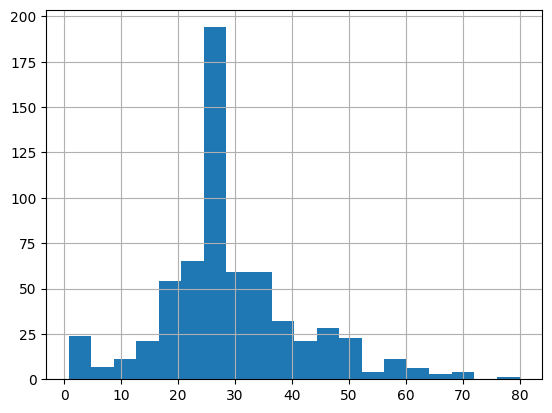

In [9]:
dftrain.age.hist(bins=20)

<Axes: ylabel='sex'>

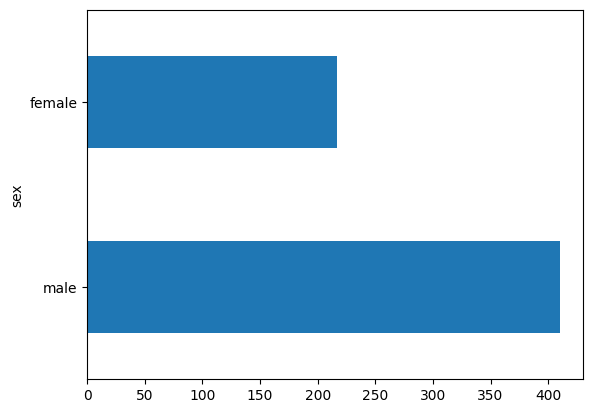

In [10]:
dftrain.sex.value_counts().plot(kind='barh')

Text(0.5, 0, '% survived')

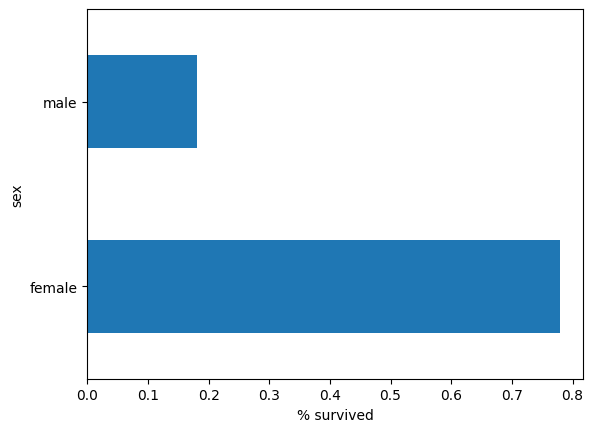

In [11]:
pd.concat([dftrain, y_train], axis=1).groupby('sex').survived.mean().plot(kind='barh').set_xlabel('% survived')